# Tutorial Regressão polinomial

In [80]:
import numpy as np
import matplotlib.pyplot as plt

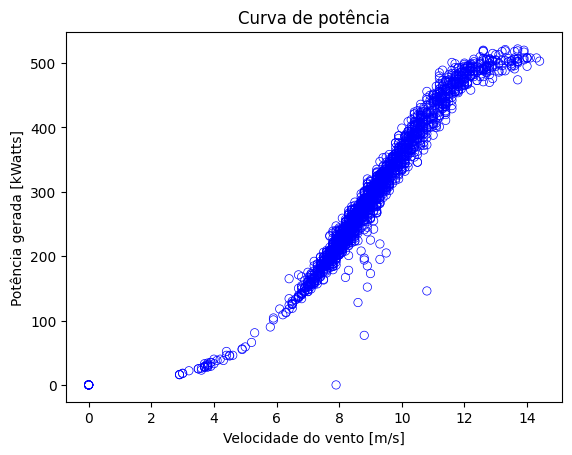

In [81]:
data = np.loadtxt('aerogerador.dat')

v = data[:, 0]
pot = data[:, 1]

# Cria o scatterplot
plt.scatter(v, pot, color='blue', marker='o', facecolors='none', edgecolors='blue', linewidths=0.5)

# Adiciona rótulos e título
plt.xlabel('Velocidade do vento [m/s]')
plt.ylabel('Potência gerada [kWatts]')
plt.title('Curva de potência')

# Exibe o gráfico
plt.show()

In [82]:
k = 3
n = len(v)
y = pot
X = np.array([])
n = len(y)
p = k + 1

In [83]:
X = np.column_stack([v ** i for i in range(k + 1)])

In [85]:
X

array([[1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00],
       [1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00],
       [1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00],
       ...,
       [1.000000e+00, 1.410000e+01, 1.988100e+02, 2.803221e+03],
       [1.000000e+00, 1.430000e+01, 2.044900e+02, 2.924207e+03],
       [1.000000e+00, 1.440000e+01, 2.073600e+02, 2.985984e+03]])

In [84]:
# Cálculo dos coeficientes utilizando a fórmula dos mínimos quadrados
B = np.linalg.inv(X.T @ X) @ X.T @ y

In [86]:
B

array([ 32.62351025, -58.76042398,  15.05191299,  -0.59240797])

In [87]:
ypred = X @ B
erro = y - ypred

In [88]:
def r2(y, erro):
    ymed = np.mean(y)
    
    SEQ = np.sum(erro ** 2)
    Syy = np.sum((y-ymed) ** 2)
    return 1 - SEQ/Syy

In [89]:
def r2_ajustado(y, erro, n, p):
    ymed = np.mean(y)
    
    SEQ = np.sum(erro ** 2)
    Syy = np.sum((y-ymed) ** 2)
    return 1 - (SEQ / Syy) * ((n - 1) / (n - p - 1))

In [90]:
R2 = r2(y, erro)
R2

0.9690229223762248

In [91]:
R2_ajustado = r2_ajustado(y, erro, n, p)
R2_ajustado

0.9689677293648684

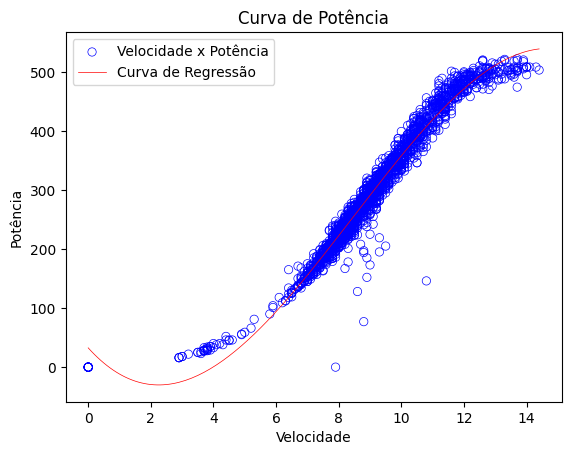

In [92]:
vv = np.arange(min(v), max(v) + 0.1, 0.1).reshape(-1, 1)

XX = np.column_stack([vv ** (l - 1) for l in range(1, k + 2)])

ypred2 = XX @ B

plt.scatter(v, y, color='blue', marker='o', label='Velocidade x Potência', facecolors='none', edgecolors='blue', linewidths=0.5)
plt.plot(vv, ypred2, color='red', linestyle='-', label='Curva de Regressão', linewidth=0.5)

plt.xlabel('Velocidade')
plt.ylabel('Potência')
plt.title('Curva de Potência')
plt.legend()

plt.show()

# Questão 1)

In [126]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

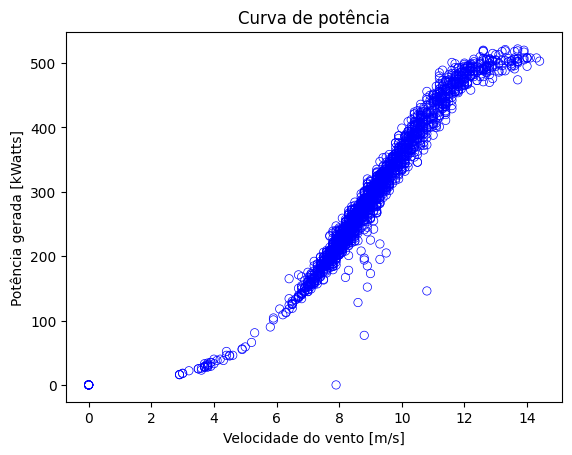

In [127]:
data = np.loadtxt('aerogerador.dat')

v = data[:, 0]
pot = data[:, 1]

# Cria o scatterplot
plt.scatter(v, pot, color='blue', marker='o', facecolors='none', edgecolors='blue', linewidths=0.5)

# Adiciona rótulos e título
plt.xlabel('Velocidade do vento [m/s]')
plt.ylabel('Potência gerada [kWatts]')
plt.title('Curva de potência')

# Exibe o gráfico
plt.show()

In [128]:
def r2(y, erro):
    ymed = np.mean(y)
    
    SEQ = np.sum(erro ** 2)
    Syy = np.sum((y-ymed) ** 2)
    return 1 - SEQ/Syy

def r2_ajustado(y, erro, n, p):
    ymed = np.mean(y)
    
    SEQ = np.sum(erro ** 2)
    Syy = np.sum((y-ymed) ** 2)
    return 1 - (SEQ / Syy) * ((n - 1) / (n - p - 1))

def aic(v, k, erro):
    SEQ = np.sum(erro ** 2)
    return (len(v) * np.log(SEQ)) + 2*k

In [129]:
n = len(v)
y = pot
X = np.array([])
n = len(y)

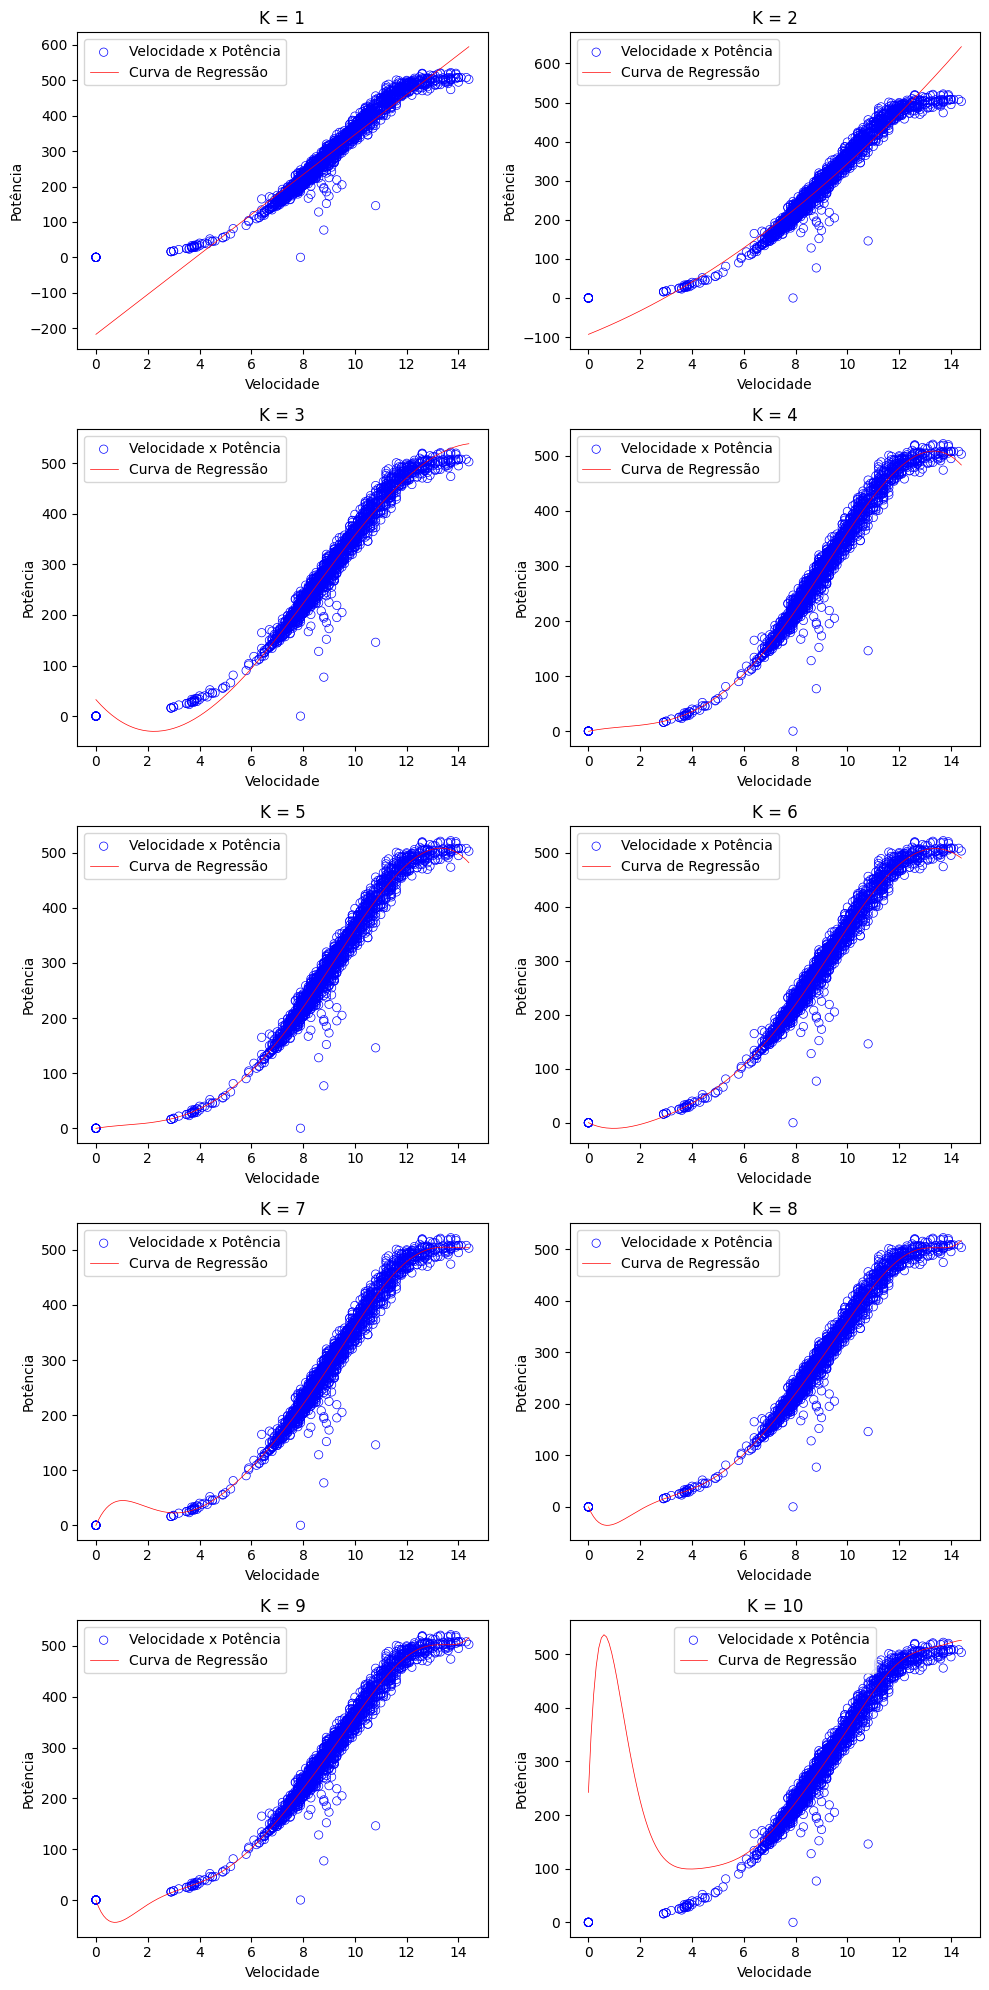

In [130]:
fig, axs = plt.subplots(5, 2, figsize=(10, 20))  # Cria a grade de subplots

data_values = []
coeficientes = []

for k in range(1, 11):
    p = k + 1
    X = np.column_stack([v ** i for i in range(k + 1)])
    B = np.linalg.inv(X.T @ X) @ X.T @ y
    coeficientes.append((B, k))
    ypred = X @ B
    erro = y - ypred
    
    R2 = r2(y, erro)
    R2_ajustado = r2_ajustado(y, erro, len(y), k + 1)
    AIC = aic(v, k, erro)
    data_values.append((R2, R2_ajustado, AIC))

    vv = np.arange(min(v), max(v) + 0.1, 0.1).reshape(-1, 1)
    XX = np.column_stack([vv ** (l - 1) for l in range(1, k + 2)])
    ypred2 = XX @ B

    row = (k - 1) // 2  # Calcula a linha do subplot na grade
    col = (k - 1) % 2   # Calcula a coluna do subplot na grade

    axs[row, col].scatter(v, y, color='blue', marker='o', label='Velocidade x Potência', facecolors='none', edgecolors='blue', linewidths=0.5)
    axs[row, col].plot(vv, ypred2, color='red', linestyle='-', label='Curva de Regressão', linewidth=0.5)

    axs[row, col].set_xlabel('Velocidade')
    axs[row, col].set_ylabel('Potência')
    axs[row, col].set_title("K = {}".format(k))
    axs[row, col].legend()

    # # Salva o gráfico como imagem
    # plt.savefig(f'grafico_{k}.png')

plt.tight_layout()  # Ajusta o layout dos subplots
plt.show()

In [131]:
# Cria o DataFrame com os valores de x, y e t e define os índices como os valores de k
data = pd.DataFrame(data_values, columns=['R2', 'R2_ajustado', 'AIC'], index=range(1, 11))
data

,R2,R2_ajustado,AIC
1,0.929160,0.929097,32374.690011
2,0.943424,0.943348,31870.821936
3,0.969023,0.968968,30517.558221
4,0.973724,0.973666,30149.206577
5,0.973726,0.973655,30151.090785
6,0.973761,0.973679,30150.054290
7,0.973857,0.973764,30143.775419
8,0.973917,0.973813,30140.612376
9,0.973883,0.973766,30145.591227
10,0.938972,0.938672,32057.264658


In [132]:
# Cria um novo DataFrame com os índices dos maiores e menores valores
new_data = {
    'maior_r2': data['R2'].idxmax(),
    'maior_r2_ajustado': data['R2_ajustado'].idxmax(),
    'menor_aic': data['AIC'].idxmin()
}

result_df = pd.DataFrame(new_data, index=[0])

result_df

,maior_r2,maior_r2_ajustado,menor_aic
0,8,8,8


In [133]:
# Cria o DataFrame com os valores de x, y e t e define os índices como os valores de k
coeficientes = pd.DataFrame(coeficientes, columns=['coeficientes', 'K'], index=range(1, 11))
coeficientes

,coeficientes,K
1,"[-217.6902790951189, 56.443855448050165]",1
2,"[-92.98003005427933, 26.723141442094747, 1.693...",2
3,"[32.623510246953884, -58.760423984079424, 15.0...",3
4,"[-0.39132609771777815, 10.372886716647951, -5....",4
5,"[-0.1798272264609202, 8.16387624933678, -3.930...",5
6,"[0.20539950515230143, -24.641288821743984, 17....",6
7,"[-0.08923416259336919, 109.57256403323436, -90...",7
8,"[-0.0052409859245377, -120.66822280972065, 134...",8
9,"[-0.32668759176920603, -146.63348309212597, 16...",9
10,"[242.22603227301536, 1202.6811367296868, -1649...",10


In [134]:
coeficientes_k5 = coeficientes.loc[coeficientes['K'] == 5]['coeficientes'].values[0]

In [136]:
coeficientes_k5

array([-1.79827226e-01,  8.16387625e+00, -3.93045528e+00,  1.24622594e+00,
       -5.37024696e-02, -3.75305436e-04])

In [138]:
# Calcule a norma euclidiana
norma = np.linalg.norm(coeficientes_k5)

print("Norma Euclidiana:", norma)

Norma Euclidiana: 9.147986397254893
